# Telecom Churn

In the highly competitive telecom industry, customer churn—when customers leave one provider for another—is a significant challenge. Churn directly impacts revenue, customer lifetime value, and brand loyalty. Identifying customers who are likely to churn allows companies to implement targeted retention strategies to improve customer satisfaction and minimize losses.

The problem is to develop a machine learning model that can predict customer churn based on historical and behavioral data. This model should analyze various factors, such as customer demographics, service usage patterns, billing details, and customer support interactions, to identify those at risk of leaving the company.

## **IMPORT LIBRARIES**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

## **1. DATASET DETAILS AND EXPLORATORY DATA ANALYSIS (EDA)**

###  DATASET OVERVIEW

In [8]:
# read file
df=pd.read_excel("Churn (1) (1).xlsx")
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [9]:
# first 5 rows after dropping column Unnamed: 0
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [10]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

### **DATA CLEANING**

In [12]:
# drop column Unnamed: 0
df.drop('Unnamed: 0',axis=1,inplace=True)

#### 'day.charge' and 'eve.mins' columns are in object type,As both columns contains numerical values,we need to convert them to float type.

In [14]:
# change dtypes
df['day.charge']=df['day.charge'].astype(float)
df['eve.mins']=df['eve.mins'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

Shape of df is (5000, 20).
There are 7 null values in day.charge & 24 in eve.mins

### Null Imputation

In [17]:
# Null imputation based on results from corr matrix (day.charge with day.mins, eve.charge with eve.mins)
# Both of the above high positive correlation
charge_day=round(df['day.charge']/df['day.mins'],3)
charge_eve=round(df['eve.charge']/df['eve.mins'],3)

avg_charge_day=charge_day.mean()
avg_charge_eve=charge_eve.mean()

df['day.charge'].fillna(df['day.mins']*avg_charge_day,inplace=True)
df['eve.mins'].fillna(df['eve.charge']/avg_charge_eve,inplace=True)

# df.isnull().sum() 
#Uncomment it to check for null values

### Duplicates Handling

In [19]:
# duplicates
df.duplicated().sum()

0

No duplicates found.

### Categorical Variables

In [22]:
# Listing cat_cols for future use
cat_cols=df.select_dtypes(exclude=np.number).columns
cat_cols

Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object')

In [23]:
# value counts for categorical variables
for i in cat_cols:
    print(df[i].value_counts())
    print("-----------------------")

state
WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: count, dtype: int64
-----------------------
area.code
area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: count, dtype: int64
-----------------------
voice.plan
no     3677
yes    1323
Name: count, dtype: int64
-----------------------
intl.plan
no     4527
yes     473
Name: count, dtype: int64
-----------------------
churn
no     4293
yes     707
Name: count, dtype: int64
-----------------------


## Visualizations

<Axes: xlabel='intl.plan', ylabel='count'>

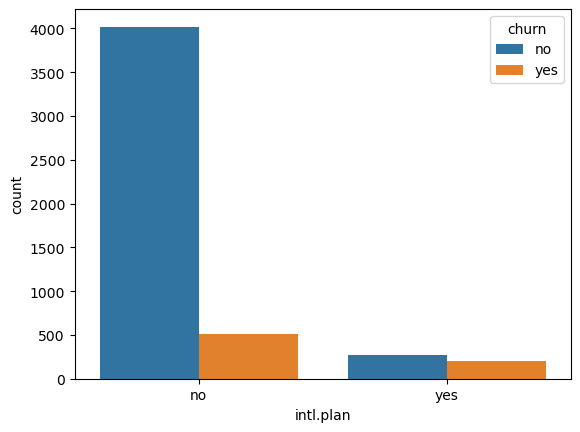

In [25]:
sns.countplot(data=df,x='intl.plan',hue='churn')

#### **Customers with an international plan churn at a higher rate than those without.**

<Axes: xlabel='state', ylabel='count'>

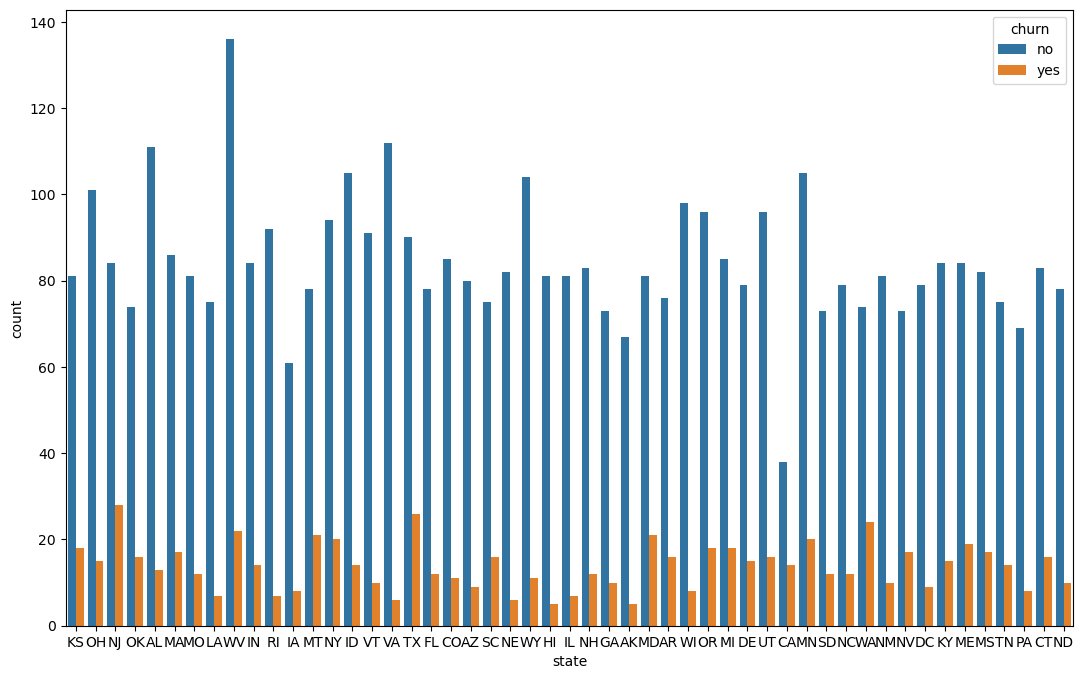

In [27]:
plt.figure(figsize=(13,8))
# df['state'].value_counts().plot(kind='bar')
sns.countplot(data=df,x='state',hue='churn')

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr().round(3),annot=True)

NameError: name 'num_cols' is not defined

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# histograms
col = ['account.length','day.calls','eve.calls','night.calls','intl.calls','day.charge','eve.charge','night.charge','intl.charge']

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()

for i, col_name in enumerate(col):
    sns.histplot(data=df, x=col_name, kde=True, ax=axs[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

#### **Most call and charge-related features follow a normal (bell-shaped) distribution, except for international calls, which are mostly low in count.**

In [ ]:
# box plots
col = ['account.length','day.calls','eve.calls','night.calls','intl.calls','day.charge','eve.charge','night.charge','intl.charge']

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()

for i, col_name in enumerate(col):
    sns.boxplot(data=df, x=col_name, ax=axs[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

#### **Most features have some outliers, especially in international calls and charges, but the data is fairly centered around the median for each.**

In [ ]:
# pie charts
col = ['intl.plan','voice.plan','churn']

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs = axs.flatten()

for i, col_name in enumerate(col):
    df[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

#### **Most customers don’t have an international or voice plan, and around 14% of customers have churned**

In [ ]:
# countplots
col = ['intl.plan','voice.plan']

fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs = axs.flatten()

for i, col_name in enumerate(col):
    sns.countplot(data=df, x=col_name, hue='churn', ax=axs[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

#### **Customers with an international plan or without a voice plan are more likely to churn.**

### Outliers Handling

In [ ]:
# Listing num_cols for future reference
num_cols=df.select_dtypes(include=np.number).columns
num_cols

In [ ]:
# outlier handling
for i in num_cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1

    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)

    outliers = df[(df[i] > upper_bound) | (df[i] < lower_bound)]

In [ ]:
# shape of outliers
outliers.shape

#### Removing outliers as we are having a large dataset of (5000, 20) to work with.

In [ ]:
# dropping outliers
df = df.drop(outliers.index)

In [ ]:
# new shape of dataset
df.shape

### Categorical Variables

In [ ]:
cat_cols

In [ ]:
# unique number of states
df['state'].nunique()

In [ ]:
# handling categorical variables
df['intl.plan']=df['intl.plan'].map({'yes':1,'no':0})
df['voice.plan']=df['voice.plan'].map({'yes':1,'no':0})
df['churn']=df['churn'].map({'yes':1,'no':0})

In [ ]:
# unique number of states
df['state'].nunique()

In [ ]:
# drop state
df.drop('state',axis=1,inplace=True)

#### state is a high-cardinality categorical variable (50+ unique values) and Most of the churn behavior is driven by customer activity, plan type, and service experience, not geography.

In [ ]:
# unique number area.code
df['area.code'].unique()

In [ ]:
df.groupby('area.code')['churn'].mean()

In [ ]:
# drop area_code
df.drop('area.code',axis=1,inplace=True)

#### as it offers no meaningful differentiation in churn behavior,we are dropping this column 

#### **Based on correlation analysis, the following pairs have perfect linear correlation:**
##### - intl.charge ↔ intl.mins
##### - day.charge ↔ day.mins
##### - night.charge ↔ night.mins
##### - eve.charge ↔ eve.mins
#### **Since 'charge' columns are derived directly from 'mins', we can drop the 'charge' columns to avoid multicollinearity.**

In [ ]:
df.drop(columns=['intl.charge', 'day.charge', 'night.charge', 'eve.charge'], inplace=True)

In [ ]:
# displaying 5 rows
df.head()

In [ ]:
df.shape

In [ ]:
# Statistical summary
df.info()

### Data Split

In [ ]:
# split data
from sklearn.model_selection import train_test_split
x=df.drop('churn',axis=1)
y=df['churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
df['intl.plan'].value_counts()

### Normalization

In [ ]:
cols =x.columns
cols

In [ ]:
# new train & test dataset
x_train_new = x_train[cols]
x_test_new = x_test[cols]
y_train_new = y_train
y_test_new = y_test

In [ ]:
# normalization on training dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_new = scaler.fit_transform(x_train_new)
x_test_new = scaler.transform(x_test_new)

# scaler file
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

## **MODEL BUILDING**

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:

grid = {'C':[0.001,0.01,0.1,1,10,100,1000], 'penalty': ['l1', 'l2']}

log_class = LogisticRegression(solver='liblinear')
cv = KFold(n_splits=5, random_state=None, shuffle=False)
gs = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
gs.fit(x_train_new, y_train_new)


In [ ]:
gs.best_params_

In [ ]:
y_pred=gs.predict(x_test_new)

In [ ]:
print(accuracy_score(y_test_new,y_pred))
print(classification_report(y_test_new,y_pred))
print(confusion_matrix(y_test_new,y_pred))

### RANDOM FOREST

#### It is a type of bagging technique that uses decision trees as estimators. It creates n decision trees using different set of rows and columns. Each tree is built on different aspects of the data, and the majority class predicted by all the decision trees is returned.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [ ]:

random_forest=RandomForestClassifier(n_estimators=50,max_samples=0.9,max_features='sqrt',max_depth=15,bootstrap=True,criterion='entropy')
random_forest.fit(x_train_new,y_train_new)
rf_pred=random_forest.predict(x_test_new)

# {'n_estimators':range(30,70,10),
#  'max_features':['log2','sqrt'],
#  'max_depth':[5,10,15],
#  'max_samples':[0.7,0.8,0.9],
#  'criterion':['gini','entropy']}

# BEST FITS FOR ABOVE ARE:

# {'criterion': 'entropy',
#  'max_depth': 15,
#  'max_features': 'sqrt',
#  'max_samples': 0.9,
#  'n_estimators': 50}


#### Hyper parameter tuning
##### Using grid search to find the optimum values for the attributes.

In [ ]:
## Using grid search to find the optimum values for the attributes.
# from sklearn.model_selection import GridSearchCV
# rf_params={'n_estimators':range(30,70,10),'max_features':['log2','sqrt'],'max_depth':[5,10,15],'max_samples':[0.7,0.8,0.9],'criterion':['gini','entropy']}
# rf_grid_search=GridSearchCV(estimator=random_forest,param_grid=rf_params,n_jobs=-1,verbose=3)
# rf_grid_search.fit(x_train_new,y_train_new)
# rf_grid_search.best_params_

In [ ]:
print("Accuracy Score :",accuracy_score(y_test_new,rf_pred))
print("--------------- Classification Report ----------------")
print(classification_report(y_test_new,rf_pred))

#### Confusion Matrix shows the counts of True Positives, True Negatives, False Positives, and False Negatives.                                   It provides detailed insights into model performance, helping evaluate accuracy, precision, recall, and other metrics.

In [ ]:
conf_matrix=confusion_matrix(y_test_new,rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True)
plt.title(" Confusion Matrix",size=16)
plt.xlabel("Predicted",color='red',size=12)
plt.ylabel("Actual",color='red',size=12)

#### The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds.                            It uses Area Under the Curve(AUC) to measure the performance of the model.

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
probability=random_forest.predict_proba(x_test_new)[:,1]
auc_score=roc_auc_score(y_test_new,probability)
fpr,tpr,thr=roc_curve(y_test_new,probability)
plt.title("ROC Curve",size=16)
plt.xlabel("FPR",size=12,color='red')
plt.ylabel("TPR",size=12,color='red')
plt.plot(fpr,tpr,color='red',lw=2,label=f'auc:{auc_score:.2f}')
plt.legend(loc='best')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.grid()

### KNN

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors = np.array(range(1,81))
param_grid_knn = dict(n_neighbors=n_neighbors)
param_grid_knn

In [ ]:
KNN = KNeighborsClassifier()
grid_knn = GridSearchCV(estimator=KNN, param_grid=param_grid_knn)
grid_knn.fit(x_train_new, y_train_new)

In [ ]:
print(grid_knn.best_score_)  #To find the best accuracy fit
print(grid_knn.best_params_) #To Find out the number of neighbours for best accuracy

Size of the Data is 4601
Split this data into 8 splits.

The dataset is split into 8 folds (partitions).


*   4601/8 = 575 obs approx each




In each iteration:




*   1 fold is used as the validation set (test data).
*   7 folds are used as the training set.
*   The process is repeated 8 times (each fold gets a chance to be the validation set exactly once).






In [ ]:
pred_knn = KNeighborsClassifier(n_neighbors=5)
pred_knn.fit(x_train_new, y_train_new)
y_pred_knn = pred_knn.predict(x_test_new)
print(classification_report(y_test_new, y_pred_knn))

In [ ]:
kfold = KFold(n_splits=8)
model_knn = KNeighborsClassifier(n_neighbors=5)
results = cross_val_score(model_knn, x_train_new, y_train_new, cv=kfold)
results_df=pd.DataFrame()
results_df['Split No'] = list(range(8))
results_df['Accuracy %'] = results*100
print("Accuracy =" ,results.mean()*100,'%')
results_df

### SVM

In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
svc = SVC()
svc.fit(x_train_new,y_train_new)

In [ ]:
y_pred=svc.predict(x_test_new)

In [ ]:
print(accuracy_score(y_test_new,y_pred))

In [ ]:
# Confusion matrix
y_pred = grid_svm.predict(x_test_new)
cm = confusion_matrix(y_test_new, y_pred)
print(cm)

In [ ]:
# classification report
print(classification_report(y_test_new, y_pred))

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
model=XGBClassifier()
model.fit(x_train_new,y_train_new)

In [ ]:
params={"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomcv = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)

In [ ]:
randomcv.fit(x_train_new,y_train_new)

In [ ]:
randomcv.best_params_

In [ ]:
xgb=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1,colsample_bytree= 1)

In [ ]:
xgb.fit(x_train_new,y_train_new)

In [ ]:
# confusion matrix
y_pred_xgb = xgb.predict(x_test_new)
print(accuracy_score(y_test_new,y_pred_xgb))
cm = confusion_matrix(y_test_new, y_pred_xgb)
print(cm)

In [ ]:
# classification report
print(classification_report(y_test_new, y_pred_xgb))

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
probability=xgb.predict_proba(x_test_new)[:,1]
auc_score=roc_auc_score(y_test_new,probability)
fpr,tpr,thr=roc_curve(y_test_new,probability)

plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')

### ANN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
ann_model = Sequential([
    Dense(128, activation='relu', input_dim=x_train_new.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(x_train_new, y_train_new, epochs=50, batch_size=32, validation_data=(x_test_new, y_test_new))

In [ ]:
loss, accuracy = ann_model.evaluate(x_test_new, y_test_new)
print(f"Test Accuracy: {accuracy:.2f}")

In [ ]:
# classification report
y_pred_ann = ann_model.predict(x_test_new)
y_pred_ann = (y_pred_ann > 0.5).astype(int)
print(classification_report(y_test_new, y_pred_ann))

## Model Evaluation

In [ ]:
# Evaluating models
models = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Logistic Regression', 'SVM', 'XGBoost', 'ANN'],
    'Accuracy': [accuracy_score(y_test_new, rf_pred), accuracy_score(y_test_new, y_pred_knn), accuracy_score(y_test_new, y_pred_lr), accuracy_score(y_test_new, y_pred), accuracy_score(y_test_new, y_pred_xgb), accuracy_score(y_test_new, y_pred_ann)],
})

models.sort_values(by='Accuracy', ascending=False)

In [ ]:
# best fit
final_model = xgb.fit(x_train_new, y_train_new)

## Deployment

In [ ]:
# deployment
import pickle
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
    print("Model saved successfully!")

In [ ]:
!pip install -q streamlit
!npm install -g localtunnel -U

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run app.py  & npx localtunnel --port 8501